In [3]:
import re
import pandas as pd
import numpy as np 
import json
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer 


dataInPath='./data_in/'
dataOutPath='./data_out/'
inputFile ='dataset_USDOT-FDOT_GP.csv'


In [4]:
input_text= pd.read_csv(dataInPath+inputFile)
input_text.head()

,clauses,label
0,This information must be submitted at least o...,1
1,Obtain certification from the Construction Ind...,1
2,Submit copies of agreements and documents.,0
3,"Determine the quantity, type of equipment, and...",1
4,"(c) Dirt, plant, and foreign material. Remove ...",0


In [19]:
stops = set(stopwords.words('english'))
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
stops.remove('should')
stops.remove('not')
stops.remove('no')


In [27]:
#전처리 함수 
def preprocessing(clause, remove_stopwords = False):
    cleansing = re.sub("[^a-zA-Z]", " ", clause)
    clean_clauses = re.sub('[^\w\s]','', cleansing)
    net_words = clean_clauses.lower().split()
     
    if remove_stopwords:
        stops = set(stopwords.words('english'))
        net_words = [w.strip() for w in net_words if not w in stops]
        #print(net_words, len(net_words))
        for word in net_words:
            if len(word)<2:
                net_words.remove(word)
        clean_clauses = ' '.join(net_words)
        
    else:
        clean_clauses = ' '.join(net_words)
    
    return clean_clauses 

In [28]:
#전체 데이터에 적용 
clean_input=[]
for clause in input_text['clauses']:
    clean_input.append(preprocessing(clause, remove_stopwords = True))

In [29]:
clean_input[0]

'information must submitted least month bid due via work underway link contractor pre qualification system'

### Stemming 

In [30]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 

ps= PorterStemmer()
clean_stem=[]
def stemming(clean_input):
    for i in range(len(clean_input)):
        words = word_tokenize(clean_input[i])
        afterstem = ' '.join([ps.stem(w) for w in words])
        clean_stem.append(afterstem)
    return clean_stem 


In [31]:
stemming(clean_input)

['inform must submit least month bid due via work underway link contractor pre qualif system',
 'obtain certif construct industri licens board requir part chapter florida statut regardless exempt allow',
 'submit copi agreement document',
 'determin quantiti type equip work necessari select produc accept materi',
 'dirt plant foreign materi remov dirt plant foreign materi vehicl equip mobil work site',
 'compon consid shall also includ relat member transfer load bridg structur',
 'sampl materi certif form avail depart websit follow url',
 'payment progress estim adjust reflect adjust',
 'depart shall notifi write within ten day cancel notic cancel laps renew propos chang polici coverag describ herein',
 'chang made contractor notifi write notif find due addit review',
 'titl page header block contract number project number name contractor name current fix complet date date submitt consecut number analysi',
 'typic section sheet revis dimens revis materi revis station rang revis begin e

In [32]:
#전처리된 트레이닝 데이터를 판다스 데이터프레임에 저장 
clean_input_df = pd.DataFrame({'clauses':clean_stem, 'label':input_text['label']})
clean_input_df.head()

,clauses,label
0,inform must submit least month bid due via wor...,1
1,obtain certif construct industri licens board ...,1
2,submit copi agreement document,0
3,determin quantiti type equip work necessari se...,1
4,dirt plant foreign materi remov dirt plant for...,0


In [33]:
print('total traing data set is: {}'.format(len(clean_input_df)))

total traing data set is: 2074


In [34]:
train_len = clean_input_df['clauses'].astype(str).apply(len)
train_len.head()

0     90
1    104
2     30
3     71
4     86
Name: clauses, dtype: int64

Text(0,0.5,'num of statement ')

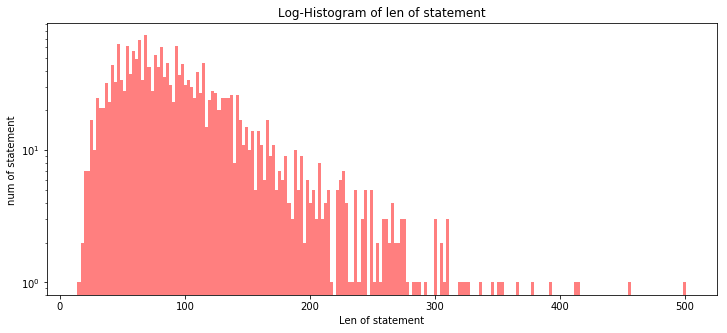

In [35]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

#히스토그램 그리기 
plt.figure(figsize=(12,5))

plt.hist(train_len, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of len of statement')

plt.xlabel('Len of statement')
plt.ylabel('num of statement ')

In [36]:
#통계분석 
print('max of review len: {}'.format(np.max(train_len)))
print('min of review len: {}'.format(np.min(train_len)))
print('mean of review len: {:.2f}'.format(np.mean(train_len)))
print('std of review len: {:.2f}'.format(np.std(train_len)))
print('median of review len: {}'.format(np.median(train_len)))

print('25 percentile of review len: {}'.format(np.percentile(train_len,25)))
print('75 percentile of review len: {}'.format(np.percentile(train_len,75)))

max of review len: 501
min of review len: 14
mean of review len: 99.44
std of review len: 57.50
median of review len: 86.0
25 percentile of review len: 60.0
75 percentile of review len: 123.75


(-0.5, 599.5, 599.5, -0.5)

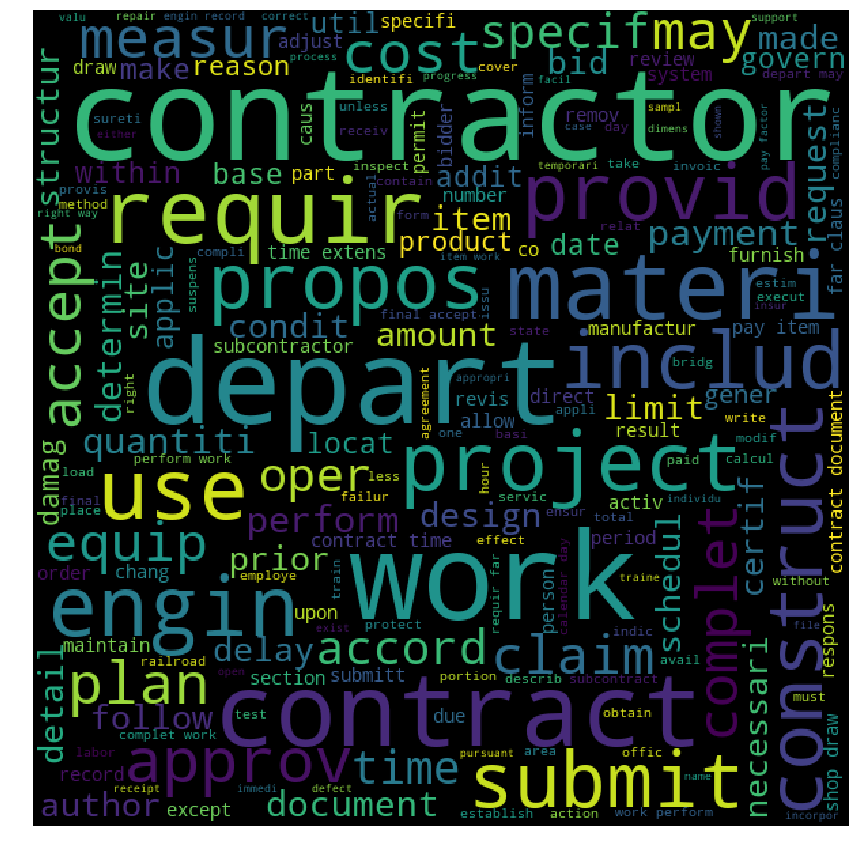

In [37]:
from wordcloud import WordCloud

cloud = WordCloud(width=600, height=600).generate(" ".join(clean_input_df['clauses']))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')

### 단어 빈도 분석 

In [38]:
word_count = clean_input_df['clauses'].apply(lambda x:len(x.split(' ')))

Text(0,0.5,'number of clauses')

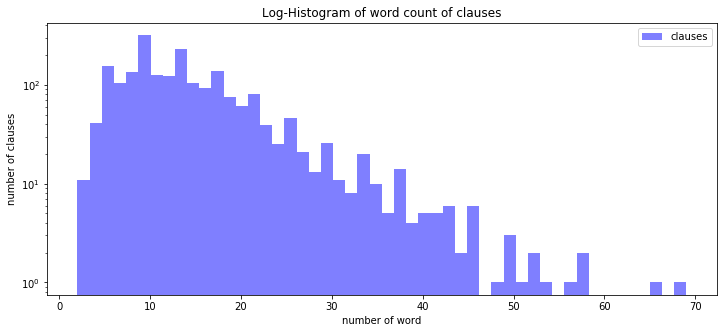

In [39]:
#히스토그램 그리기 
plt.figure(figsize=(12,5))

plt.hist(word_count, bins=50, alpha=0.5, color='b', label='clauses')
plt.yscale('log', nonposy='clip')
plt.legend()
plt.title('Log-Histogram of word count of clauses')

plt.xlabel('number of word')
plt.ylabel('number of clauses')

In [41]:
#통계분석 
print('max number of word: {}'.format(np.max(word_count)))
print('min number of word: {}'.format(np.min(word_count)))
print('mean number of word: {:.2f}'.format(np.mean(word_count)))
print('std of word: {:.2f}'.format(np.std(word_count)))
print('median of word: {}'.format(np.median(word_count)))

print('25 percentile of word: {}'.format(np.percentile(word_count,25)))
print('75 percentile of word: {}'.format(np.percentile(word_count,75)))

max number of word: 69
min number of word: 2
mean number of word: 14.59
std of word: 8.23
median of word: 13.0
25 percentile of word: 9.0
75 percentile of word: 18.0


In [42]:
tokenizer = Tokenizer()  #텐서플로우의 전처리 모듈 사용 
tokenizer.fit_on_texts(clean_stem)
text_sequences = tokenizer.texts_to_sequences(clean_stem)
print(text_sequences[10])  #전처리된 단어들이 모두 데이터프레임 인덱스의 벡터로 구성됨 

[562, 1305, 1618, 1098, 3, 87, 10, 87, 196, 2, 196, 297, 563, 20, 73, 73, 88, 1306, 87, 283]


In [43]:
#단어와 인덱스 사전 확인 
word_vocab = tokenizer.word_index 
word_vocab

{'work': 1,
 'contractor': 2,
 'contract': 3,
 'depart': 4,
 'materi': 5,
 'engin': 6,
 'requir': 7,
 'submit': 8,
 'time': 9,
 'project': 10,
 'may': 11,
 'includ': 12,
 'construct': 13,
 'propos': 14,
 'use': 15,
 'accept': 16,
 'provid': 17,
 'plan': 18,
 'shall': 19,
 'complet': 20,
 'perform': 21,
 'payment': 22,
 'item': 23,
 'cost': 24,
 'document': 25,
 'bid': 26,
 'day': 27,
 'approv': 28,
 'quantiti': 29,
 'oper': 30,
 'claim': 31,
 'accord': 32,
 'equip': 33,
 'final': 34,
 'pay': 35,
 'draw': 36,
 'measur': 37,
 'within': 38,
 'follow': 39,
 'determin': 40,
 'specif': 41,
 'limit': 42,
 'price': 43,
 'amount': 44,
 'record': 45,
 'made': 46,
 'delay': 47,
 'damag': 48,
 'request': 49,
 'state': 50,
 'govern': 51,
 'condit': 52,
 'author': 53,
 'design': 54,
 'certif': 55,
 'addit': 56,
 'schedul': 57,
 'written': 58,
 'util': 59,
 'control': 60,
 'structur': 61,
 'test': 62,
 'necessari': 63,
 'section': 64,
 'compens': 65,
 'applic': 66,
 'site': 67,
 'right': 68,
 'respon

In [44]:
#단어 사전과 전체 단어 개수 저장 

data_configs={}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)+1

In [45]:
print("전체 단어 개수: ", len(word_vocab))

전체 단어 개수:  2306


In [46]:
train_inputs = pad_sequences(text_sequences, maxlen=90, padding='post')

print('shape of train data: ', train_inputs.shape)

shape of train data:  (2074, 90)


* 정답을 나타내는 라벨도 넘파이배열로 저장한다. 

In [47]:
train_labels = np.array(input_text['label'])

print('shape of traib labels: ', train_labels.shape)

shape of traib labels:  (2074,)


In [48]:
train_Input_data='train_all.npy'
train_label_data='train_all.npy'
train_clean_data='train_all.csv'
config_file = 'data_config_all.json'


np.save(open(dataOutPath+ train_Input_data, 'wb'), train_inputs)
np.save(open(dataOutPath+ train_label_data, 'wb'), train_labels)

clean_input_df.to_csv(dataOutPath+train_clean_data, index=False)

json.dump(data_configs, open(dataOutPath+config_file, 'w'), ensure_ascii=False)